In [171]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
#mpl.use('pdf')
import sys
sys.path.append("../")
import copy
from Plotting.generate_database import ResultsDatabaseGenerator
from common_packages.utilities import get_equivalent_classical_layer_size, get_num_parameters_per_quantum_layer
from Plotting.Plot import BasicPlot, MultiPlot
import pandas as pd
import seaborn as sns
colors =   ["#5dd448",
            "#bfa900",
            "#ec742f",
            "#e9496f",
            "#b04ca4",]
palette = sns.color_palette('pastel')
colors = palette.as_hex()

sns.set_style('ticks')

#colors = ["#332288", "#88CCEE", "#44AA99", "#117733", "#999933", "#DDCC77", "#CC6677", "#882255", "#AA4499"]
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=colors)
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams["font.family"] = "sans-serif"
plt.rcParams["font.size"] = 10
plt.rcParams["axes.linewidth"] = 0.5

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [172]:
ex_path = "/home/st4eve/Mounts/graham/synthetic_data/Synthetic_Quantum_Base_Experiment4"
ex_path_kerr = "/home/st4eve/Mounts/graham/synthetic_data/Synthetic_Quantum_Base_Kerr"
ex_path_kerr8 = "/home/st4eve/Mounts/graham/synthetic_data/Classical_Small_kerr"
#ex_path_kerr8 = "/home/st4eve/Mounts/graham/synthetic_data/Synthetic_Quantum_Base_Kerr_input8"
ex_path_classical_small_kerr = './Classical_Small_kerr'

def generate_database(ex_path):
    dbGen = ResultsDatabaseGenerator()
    dbGen.initialize_from_folder(ex_path)
    data = dbGen.data
    config = data[1]['config']
    config.pop('__doc__', None)
    #config.pop('iteration', None)
    df = pd.DataFrame(columns=config.keys())
    df['iteration'] = np.nan
    for key in data[1]['metrics'].keys():
        df[key] = np.nan
    for i in data.keys():
        config = data[i]['config']
        config.pop('__doc__', None)
        try:
            config['iteration']
        except KeyError:
            config['iteration'] = 1
        if config['iteration'] != -1:
            metrics = data[i]['metrics']
            temp_dict = {}
            for key in metrics.keys():
                temp_dict[key] = metrics[key]
            for key in config.keys():
                temp_dict[key] = config[key]
            df.loc[i] = temp_dict
    if 'num_params' in df.columns:
        df['num_params'] = df['num_params'].apply(lambda x: x[0]).astype(int)
    df.rename(columns={'accuracy': 'acc', 'val_accuracy': 'val_acc'}, inplace=True)
    return df

df_orig = generate_database(ex_path)
df_kerr = generate_database(ex_path_kerr)
df_kerr8 = generate_database(ex_path_kerr8)
df_kerr8_small = generate_database(ex_path_classical_small_kerr)


df_kerr.drop(df_kerr.loc[(df_kerr['network_type']=='classical') & (df_kerr['num_qumodes']==4)].index, inplace=True)
df_kerr.drop(df_kerr.loc[(df_kerr['network_type']=='classical') & (df_kerr['n_layers']==4)].index, inplace=True)
df_kerr.drop(df_kerr.loc[(df_kerr['network_type']=='classical') & (df_kerr['n_layers']==5)].index, inplace=True)

# df_orig.drop_duplicates(subset=['network_type', 'num_qumodes', 'cutoff', 'n_layers', 'iteration', 'num_params'], inplace=True)
# df_kerr.drop_duplicates(subset=['network_type', 'num_qumodes', 'cutoff', 'n_layers', 'iteration', 'num_params'], inplace=True)
# df_kerr8.drop_duplicates(subset=['network_type', 'num_qumodes', 'cutoff', 'n_layers', 'iteration', 'num_params'], inplace=True)
# df_kerr8 = df_kerr8[df_kerr8['iteration']<=10]

Exception Expecting value: line 1 column 1 (char 0)
Error reading from metrics file /home/st4eve/Mounts/graham/synthetic_data/Synthetic_Quantum_Base_Experiment4/46 . Ignoring file...
Exception Expecting value: line 1 column 1 (char 0)
Error reading from metrics file /home/st4eve/Mounts/graham/synthetic_data/Synthetic_Quantum_Base_Experiment4/81 . Ignoring file...
Exception Expecting value: line 1 column 1 (char 0)
Error reading from metrics file /home/st4eve/Mounts/graham/synthetic_data/Synthetic_Quantum_Base_Experiment4/153 . Ignoring file...
Exception Expecting value: line 1 column 1 (char 0)
Error reading from metrics file /home/st4eve/Mounts/graham/synthetic_data/Synthetic_Quantum_Base_Experiment4/72 . Ignoring file...
Exception Expecting value: line 1 column 1 (char 0)
Error reading from metrics file /home/st4eve/Mounts/graham/synthetic_data/Synthetic_Quantum_Base_Experiment4/99 . Ignoring file...
Exception Expecting value: line 1 column 1 (char 0)
Error reading from metrics file 

In [173]:
display(df_kerr8)

,cutoff,iteration,n_layers,network_type,num_qumodes,acc,epoch,loss,num_params,val_acc,val_loss
1031,5,3,5,quantum,4,"[0.2514285743236542, 0.3942857086658478, 0.384...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1.406705617904663, 1.3745627403259277, 1.3473...",460,"[0.28333333134651184, 0.4399999976158142, 0.58...","[1.3929181098937988, 1.3588467836380005, 1.327..."
43516,-1,17,3,classical,5,"[0.3199999928474426, 0.4028571546077728, 0.588...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1.3625154495239258, 1.2493008375167847, 1.052...",518,"[0.34333333373069763, 0.596666693687439, 0.620...","[1.3173775672912598, 1.1539981365203857, 0.938..."
49,9,2,1,quantum,2,"[0.25999999046325684, 0.31142857670783997, 0.3...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1.4391298294067383, 1.3879575729370117, 1.367...",120,"[0.3166666626930237, 0.2866666615009308, 0.396...","[1.4009509086608887, 1.375930905342102, 1.3595..."
1014,9,3,3,quantum,3,"[0.2328571379184723, 0.28285714983940125, 0.39...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1.4432705640792847, 1.396140694618225, 1.3647...",250,"[0.25, 0.38999998569488525, 0.4566666781902313...","[1.408129334449768, 1.3764991760253906, 1.3430..."
363,5,9,1,quantum,4,"[0.261428564786911, 0.4699999988079071, 0.5171...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1.3935723304748535, 1.352504849433899, 1.3111...",252,"[0.46666666865348816, 0.5400000214576721, 0.52...","[1.367815375328064, 1.3325169086456299, 1.2839..."
...,...,...,...,...,...,...,...,...,...,...,...
43352,-1,11,2,classical,1,"[0.22714285552501678, 0.2542857229709625, 0.23...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1.387089490890503, 1.3865070343017578, 1.3864...",75,"[0.25333333015441895, 0.25333333015441895, 0.2...","[1.3862754106521606, 1.386265754699707, 1.3862..."
43375,-1,11,5,classical,5,"[0.2914285659790039, 0.4457142949104309, 0.439...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1.3430752754211426, 1.195401906967163, 1.0709...",590,"[0.41333332657814026, 0.4466666579246521, 0.47...","[1.2640650272369385, 1.0983966588974, 0.955635..."
43595,-1,20,4,classical,2,"[0.22142857313156128, 0.2442857176065445, 0.25...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1.3879847526550293, 1.3869446516036987, 1.386...",181,"[0.25333333015441895, 0.25333333015441895, 0.2...","[1.3862627744674683, 1.3862614631652832, 1.386..."
43511,-1,17,2,classical,1,"[0.21571429073810577, 0.2800000011920929, 0.23...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1.394607424736023, 1.3846333026885986, 1.3718...",75,"[0.273333340883255, 0.12666666507720947, 0.193...","[1.3860193490982056, 1.378777027130127, 1.3667..."


Kerr Encoding
Kerr Input 8


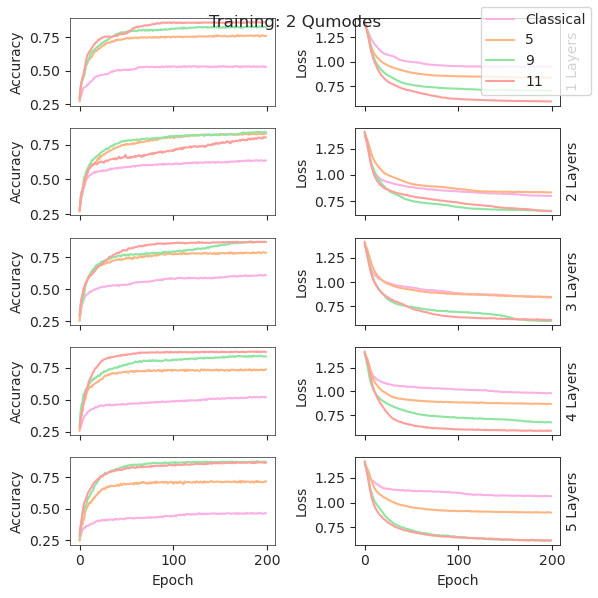

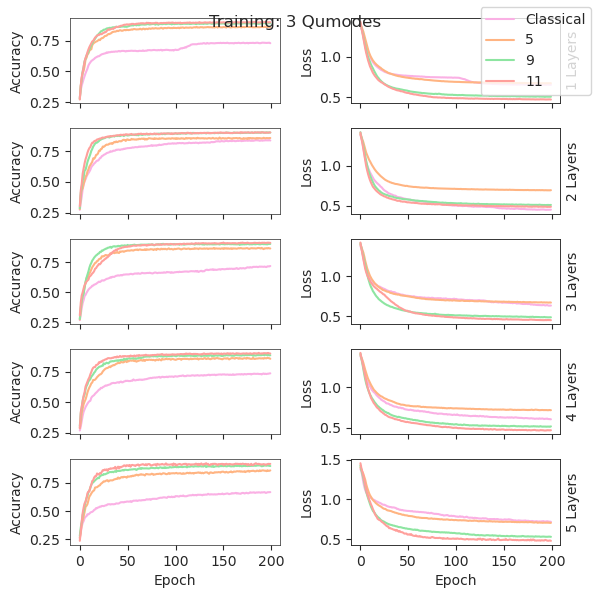

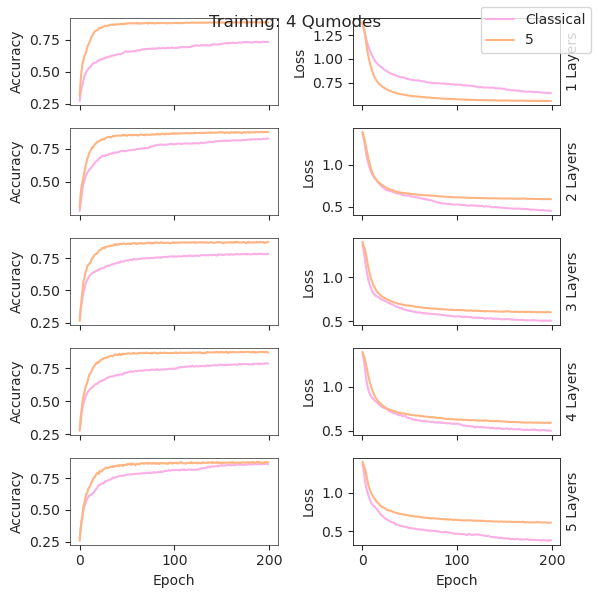

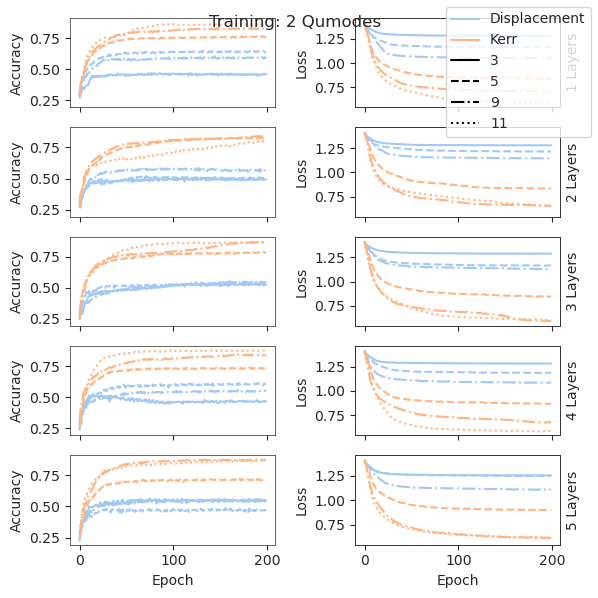

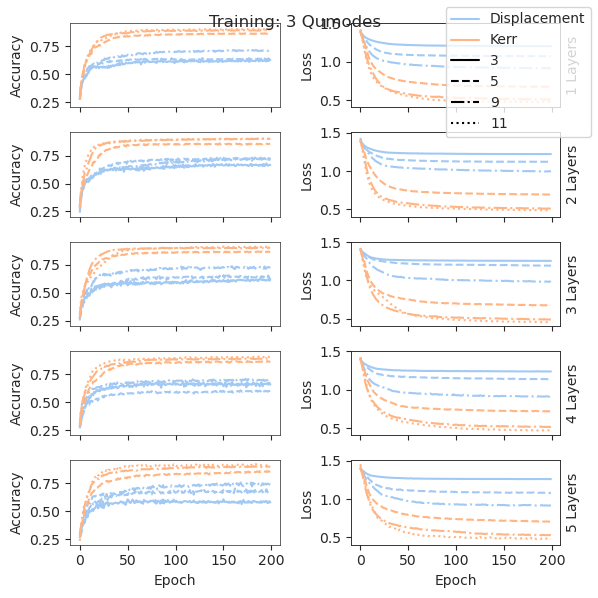

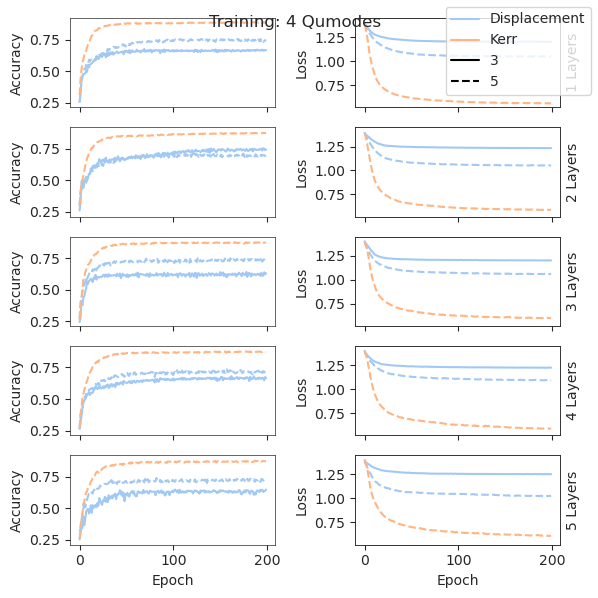

In [176]:
df_orig.loc[df_orig['network_type']=='classical', 'cutoff'] = 'classical'
df_orig.drop(df_orig[df_orig['cutoff']==1].index, inplace=True)
df_kerr8.loc[df_kerr8['network_type']=='classical', 'cutoff'] = 'classical'
def process_data(df, groups=['network_type', 'n_layers', 'num_qumodes', 'num_params', 'cutoff']):
    df_mean = df.groupby(groups).apply(lambda x: pd.DataFrame({
        'acc': [np.mean(x['acc'].tolist(), axis=0)],
        'val_acc': [np.mean(x['val_acc'].tolist(), axis=0)],
        'loss': [np.mean(x['loss'].tolist(), axis=0)],
        'val_loss': [np.mean(x['val_loss'].tolist(), axis=0)],
        'num_exps': [len(x['acc'].tolist())],
        'raw_data':[x['acc'].tolist()]
    }))

    df_std = df.groupby(groups).apply(lambda x: pd.DataFrame({
        'acc_std': [np.std(x['acc'].tolist(), axis=0)],
        'val_acc_std': [np.std(x['val_acc'].tolist(), axis=0)],
        'loss_std': [np.std(x['loss'].tolist(), axis=0)],
        'val_loss_std': [np.std(x['val_loss'].tolist(), axis=0)]
    }))
    df_max = df.groupby(groups).apply(lambda x: pd.DataFrame({
        'acc_max': [np.max(x['acc'].tolist(), axis=0)],
        'val_acc_max': [np.max(x['val_acc'].tolist(), axis=0)],
        'loss_min': [np.min(x['loss'].tolist(), axis=0)],
        'val_loss_min': [np.min(x['val_loss'].tolist(), axis=0)]
    }))
    df_out = pd.concat([df_mean, df_std, df_max], axis=1)
    df_out.reset_index(inplace=True)
    df_out.drop(columns=f'level_{len(groups)}', inplace=True)
    df_out.sort_values(['network_type', 'num_qumodes', 'n_layers'],inplace=True)
    return df_out
df_o = process_data(df_orig)
df_k = process_data(df_kerr)
df_k8 = process_data(df_kerr8)

def plot_training_cutoff_sweep(df, fname='cutoff_sweep', dataset='training'):

    for n in df.loc[df['network_type']=='quantum', 'num_qumodes'].unique():
        df_n = df[df['num_qumodes']==n]
        fig, axs = plt.subplots(ncols=2, nrows=len(df['n_layers'].unique()), figsize=(6,6), sharex=True)
        color_dict = dict(zip(df[df['num_qumodes']==n]['cutoff'].unique(), colors))
        color_dict['classical'] = colors[-4]
        for i in df_n.loc[df_n['network_type']=='quantum', 'n_layers'].unique():
            ax2  = axs[i-1,1].twinx()
            ax2.set_yticks([])
            ax2.set_yticklabels([])
            ax2.set_ylabel(f'{i} Layers')
        prefix = 'val_' if dataset=='validation' else '' 
        for i, row in df_n.iterrows():
            idx_row = row['n_layers'] - 1
            epochs = [i for i in range(len(row[prefix+'acc']))]
            axs[idx_row, 0].plot(epochs, row[prefix+'acc'], color=color_dict[row['cutoff']])
            axs[idx_row, 1].plot(epochs, row[prefix+'loss'], color=color_dict[row['cutoff']])
            
            axs[-1,0].set_xlabel('Epoch')
            axs[-1,1].set_xlabel('Epoch')
            axs[idx_row,0].set_ylabel('Accuracy')
            axs[idx_row,1].set_ylabel('Loss')


        for key,val in color_dict.items():
            plt.plot([], [], color=val, label=f'{key}'.capitalize())

        fig.legend()
        fig.tight_layout()
        fig.suptitle(f'{dataset.capitalize()}: {n} Qumodes')
        plt.savefig(f'./cutoff_sweep_plots/{fname}_{dataset.capitalize()}_{n}qumodes.png', dpi=300)
        plt.show()

def plot_encoding_comparison(df, fname='encoding comparison', dataset='trinaing'):
    for n in df.loc[df['network_type']=='quantum', 'num_qumodes'].unique():
        df_n = df[(df['num_qumodes']==n) & (df['network_type']=='quantum')]
        fig, axs = plt.subplots(ncols=2, nrows=len(df_n['n_layers'].unique()), figsize=(6,6), sharex=True, sharey='col')
        color_dict = dict(zip(df_n['encoding'].unique(), colors))
        style_dict = dict(zip(df_n['cutoff'].unique(), ['-', '--', '-.', ':']))
        for i in df_n.loc[df_n['network_type']=='quantum', 'n_layers'].unique():
            ax2  = axs[i-1,1].twinx()
            ax2.set_yticks([])
            ax2.set_yticklabels([])
            ax2.set_ylabel(f'{i} Layers')
        prefix = 'val_' if dataset=='validation' else '' 
        for i, row in df_n.iterrows():
            idx_row = row['n_layers'] - 1
            epochs = [i for i in range(len(row[prefix+'acc']))]
            axs[idx_row, 0].plot(epochs, row[prefix+'acc'], color=color_dict[row['encoding']], linestyle=style_dict[row['cutoff']])
            axs[idx_row, 1].plot(epochs, row[prefix+'loss'], color=color_dict[row['encoding']], linestyle=style_dict[row['cutoff']])
            
            axs[-1,0].set_xlabel('Epoch')
            axs[-1,1].set_xlabel('Epoch')
            axs[idx_row,0].set_ylabel('Accuracy')
            axs[idx_row,1].set_ylabel('Loss')


        for key,val in color_dict.items():
            plt.plot([], [], color=val, label=f'{key}'.capitalize())
        for key,val in style_dict.items():
            plt.plot([], [], color='black', linestyle=val, label=f'{key}'.capitalize())

        fig.legend()
        fig.tight_layout()
        fig.suptitle(f'{dataset.capitalize()}: {n} Qumodes')
        plt.savefig(f'./encoding_comparison_plots/{fname}_{dataset.capitalize()}_{n}qumodes.png', dpi=300)
        plt.show()

#plot_training_cutoff_sweep(df_o, 'cutoff_sweep', dataset='validation')
print('Kerr Encoding')
#plot_training_cutoff_sweep(df_k, 'cutoff_sweep_kerr')
# plot_training_cutoff_sweep(df_k, 'cutoff_sweep_kerr', dataset='validation')

print('Kerr Input 8')
plot_training_cutoff_sweep(df_k8, 'cutoff_sweep_kerr8')

encodings = {'displacement': df_orig, 'kerr': df_kerr8}
df_full = pd.concat(encodings, names=['encoding'])
df_f = process_data(df_full, groups=['encoding', 'network_type', 'n_layers', 'num_qumodes', 'num_params', 'cutoff'])

plot_encoding_comparison(df_f, 'encoding_comparison', dataset='training')


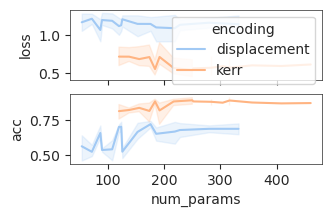

In [177]:

def generate_averaged_database(df):
    df_mean = copy.deepcopy(df)
    df_mean['acc'] = df_mean['acc'].apply(lambda x: x[-1])
    df_mean['acc_max'] = df_mean['acc_max'].apply(lambda x: x[-1])
    df_mean['acc_std'] = df_mean['acc_std'].apply(lambda x: x[-1])
    df_mean['acc_max_std'] = df_mean['acc_std'] 
    df_mean['val_acc'] = df_mean['val_acc'].apply(lambda x: x[-1])
    df_mean['val_acc_std'] = df_mean['val_acc_std'].apply(lambda x: x[-1])
    df_mean['loss'] = df_mean['loss'].apply(lambda x: x[-1])
    df_mean['loss_std'] = df_mean['loss_std'].apply(lambda x: x[-1])
    df_mean['loss_min'] = df_mean['loss_min'].apply(lambda x: x[-1])
    df_mean['val_loss'] = df_mean['val_loss'].apply(lambda x: x[-1])
    df_mean['val_loss_min'] = df_mean['val_loss_min'].apply(lambda x: x[-1])
    df_mean['val_loss_std'] = df_mean['val_loss_std'].apply(lambda x: x[-1])
    df_mean['acc_ratio'] = df_mean['acc']/df_mean['num_params']
    df_mean['acc_ratio_std'] = df_mean['acc_std']/df_mean['num_params']
    df_mean['val_acc_ratio'] = df_mean['val_acc']/df_mean['num_params']
    df_mean['val_acc_ratio_std'] = df_mean['val_acc_std']/df_mean['num_params']
    df_mean['loss_ratio'] = df_mean['loss']/df_mean['num_params']
    df_mean['loss_ratio_std'] = df_mean['loss_std']/df_mean['num_params']
    df_mean['val_loss_ratio'] = df_mean['val_loss']/df_mean['num_params']
    df_mean['val_loss_ratio_std'] = df_mean['val_loss_std']/df_mean['num_params']
    df_mean.sort_values('num_params')
    return df_mean

def plot_acc_per_param(df, fname='AccPerParam', cutoffs=[3,7,9,'classical']):
    color_dict = dict(zip(cutoffs, colors))
    color_dict['classical'] = colors[-1]
    metrics = ['acc', 'loss']
    axs_labels_dict = dict(zip(metrics, ['Accuracy', 'Loss', 'Accuracy', 'Loss']))
    for n in df['num_qumodes'].unique():
        fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(6,6), sharex=True)
        axs_dict = dict(zip(metrics, axs.flatten()))
        for cutoff in cutoffs:
            row = df.loc[(df['num_qumodes']==n) & (df['cutoff']==cutoff)]
            for metric in metrics:
                axs_dict[metric].errorbar(row['num_params'].values, row[metric].values, yerr=row[f'{metric}_std'], fmt='.', color=color_dict[cutoff], alpha=0.8)
                axs_dict[metric].plot(row['num_params'].values, row[metric].values, '--', color=color_dict[cutoff], alpha=0.8)


        for key,val in color_dict.items():
            plt.plot([], [], color=val, label=f'{key}'.capitalize())

        # ax2  = axs[0].twinx()
        # ax2.set_yticks([])
        # ax2.set_yticklabels([])
        # ax2.set_ylabel(f'Training') 
    
        # ax2  = axs[1].twinx()
        # ax2.set_yticks([])
        # ax2.set_yticklabels([])
        # ax2.set_ylabel(f'Testing')   

        fig.legend()
        fig.supxlabel('Number of Parameters')
        fig.suptitle(f'{n} Qumodes')

        for key, val in axs_labels_dict.items():
            axs_dict[key].set_ylabel(val)
        fig.tight_layout()
        plt.savefig(f'cutoff_sweep_plots/{fname}_AccPerParam_{n}qumodes.png', dpi=300)
        plt.show()


    fig, axs = plt.subplots(ncols=1, nrows=2, figsize=(6,6), sharex=True)
    axs_dict = dict(zip(metrics, axs.flatten()))
    axs[0].axvline(x=df[df['num_qumodes']==4]['num_params'].min(), color='k', linestyle='--')
    axs[0].axvline(x=df[df['num_qumodes']==4]['num_params'].max(), color='k', linestyle='--')
    axs[0].axvline(x=df[df['num_qumodes']==3]['num_params'].min(), color='b', linestyle='--')
    axs[0].axvline(x=df[df['num_qumodes']==3]['num_params'].max(), color='b', linestyle='--')
    axs[0].axvline(x=df[df['num_qumodes']==2]['num_params'].min(), color='r', linestyle='--')
    axs[0].axvline(x=df[df['num_qumodes']==2]['num_params'].max(), color='r', linestyle='--')
    for cutoff in cutoffs:
            row = copy.deepcopy(df[(df['cutoff']==cutoff)])
            row.sort_values('num_params', inplace=True)
            for metric in metrics:
                #axs_dict[metric].errorbar(row['num_params'].values, row[metric].values, yerr=row[f'{metric}_std'], fmt='.', color=color_dict[cutoff], alpha=0.8)
                axs_dict[metric].plot(row['num_params'].values, row[metric].values, '-', marker='.', color=color_dict[cutoff], alpha=0.8)

    for key,val in color_dict.items():
        plt.plot([], [], color=val, label=f'{key}'.capitalize())

    # ax2  = axs[1].twinx()
    # ax2.set_yticks([])
    # ax2.set_yticklabels([])
    # ax2.set_ylabel(f'Training') 

    # ax2  = axs[1].twinx()
    # ax2.set_yticks([])
    # ax2.set_yticklabels([])
    # ax2.set_ylabel(f'Testing')   

    fig.legend()
    fig.supxlabel('Number of Parameters')
    fig.suptitle(f'All Qumodes')
    for key, val in axs_labels_dict.items():
        axs_dict[key].set_ylabel(val)
    fig.tight_layout()
    plt.savefig(f'cutoff_sweep_plots/{fname}_AccPerParam_allqumodes.png', dpi=300)
    plt.savefig(f'cutoff_sweep_plots/{fname}_AccPerParam_allqumodes.svg')
    plt.show()
    
    
    # fig, axs = plt.subplots(figsize=(6,6), sharex=True)
    # metric = 'val_acc'
    # for cutoff in cutoffs:
    #     row = copy.deepcopy(df[(df['cutoff']==cutoff)])
    #     row.sort_values('num_params', inplace=True)
    #     #axs.errorbar(row['num_params'].values, row[metric].values, yerr=row[f'{metric}_std'], fmt='.', color=color_dict[cutoff], alpha=0.8)
    #     axs.plot(row['num_params'].values, row[metric].values, '-', color=color_dict[cutoff], alpha=0.8)

    # for key in cutoffs:
    #     plt.plot([], [], color=color_dict[key], label=f'{key}'.capitalize()) 

    # fig.legend()
    # fig.supxlabel('Number of Parameters')
    # axs.set_ylabel('Validation Accuracy')
    # fig.tight_layout()
    # plt.savefig(f'cutoff_sweep_plots/{fname}_AccLarg_allqumodes.png', dpi=300)
    # plt.show()


    
    

df_o_mean = generate_averaged_database(df_o)
df_k_mean = generate_averaged_database(df_k)
df_k8_mean = generate_averaged_database(df_k8)
#plot_acc_per_param(df_o_mean, 'cutoff_sweep', cutoffs=[5,3, 7, 9, 'classical'])
#plot_acc_per_param(df_k_mean, 'cutoff_sweep_kerr', cutoffs=[5,10,'classical'])
#plot_acc_per_param(df_k8_mean, 'cutoff_sweep_kerr8', cutoffs=[5,'classical'])


# def plot_comparison(metric, ylabel='Validation Accuracy'):
#     fig, axs = plt.subplots(figsize=(6,6), sharex=True)
#     color_dict = dict(zip([5,7,10,'classical'], colors))
#     for cutoff in [7,'classical']:
#         row = copy.deepcopy(df_o_mean[(df_o_mean['cutoff']==cutoff)])
#         row.sort_values('num_params', inplace=True)
#         #axs.errorbar(row['num_params'].values, row[metric].values, yerr=row[f'{metric}_std'], fmt='.', color=color_dict[cutoff], alpha=0.8)
#         axs.plot(row['num_params'].values, row[metric].values, '--', color=color_dict[cutoff], alpha=0.8)
#         #axs.fill_between(row['num_params'].values, row[metric]-row[f'{metric}_std'], row[metric]+row[f'{metric}_std'], color=color_dict[cutoff], alpha=0.1)
#     for cutoff in [10,'classical']:
#         row = copy.deepcopy(df_k_mean[(df_k_mean['cutoff']==cutoff)])
#         row.sort_values('num_params', inplace=True)
#         #axs.errorbar(row['num_params'].values, row[metric].values, yerr=row[f'{metric}_std'], fmt='.', color=color_dict[cutoff], alpha=0.8)
#         axs.plot(row['num_params'].values, row[metric].values, '--', color=color_dict[cutoff], alpha=0.8)
#         #axs.fill_between(row['num_params'].values, row[metric]-row[f'{metric}_std'], row[metric]+row[f'{metric}_std'], color=color_dict[cutoff], alpha=0.1)

#     def legend(label, color, linestyle='-', marker=''):
#         plt.plot([],[], color=color, ls=linestyle, marker=marker, label=label.capitalize())
#         return

# plot_comparison('val_acc', 'Validation Accuracy')
# plot_comparison('loss', 'Loss')

df_f_mean = generate_averaged_database(df_f)
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(3.25, 2), sharex=True)
sns.lineplot(df_f_mean[df_f_mean['network_type']=='quantum'], x='num_params', y='loss', hue='encoding', markers=True, dashes=False, ax=ax[0])
sns.lineplot(df_f_mean[df_f_mean['network_type']=='quantum'], x='num_params', y='acc', hue='encoding', markers=True, dashes=False, ax=ax[1], legend=None)
plt.savefig('encoding_comparison_plots/encoding_comparison.svg')

# Accuracy Violin Plots

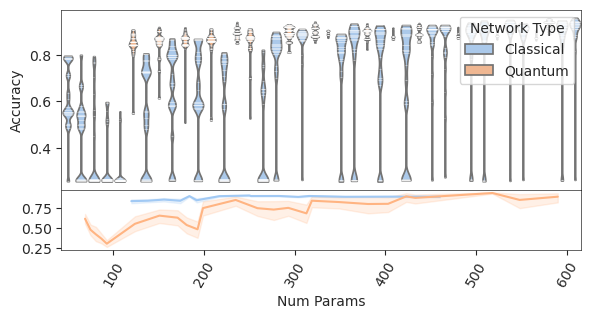

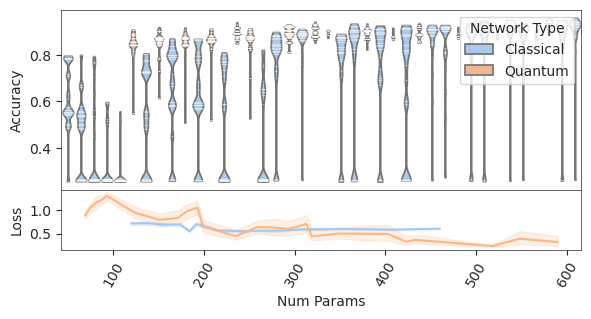

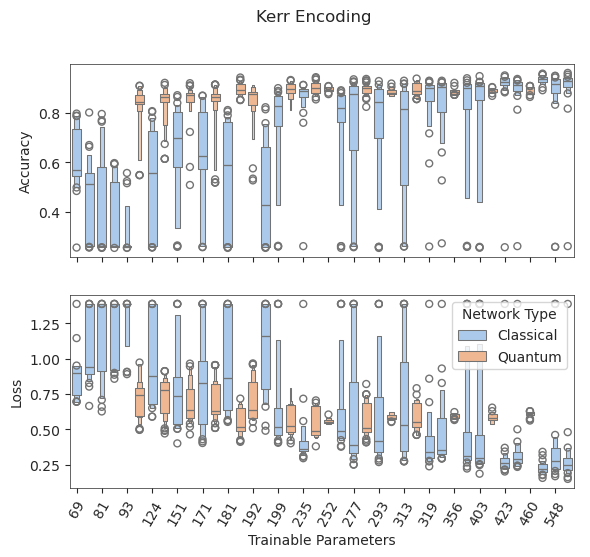

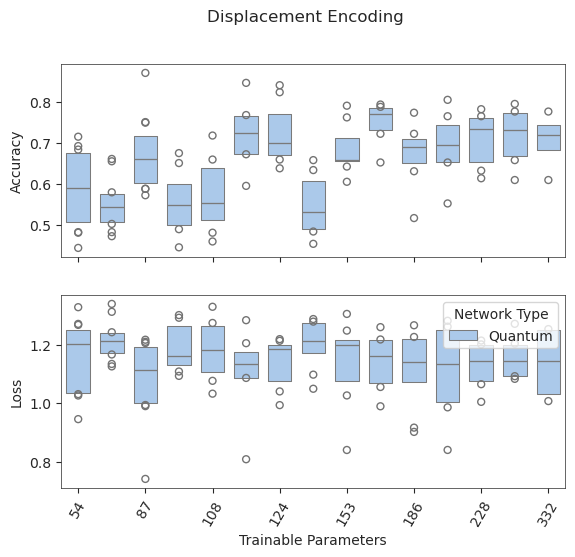

In [178]:
def pd_last_epoch(df):
    df_out = copy.deepcopy(df)
    df_out['acc'] = df_out['acc'].apply(lambda x: max(x))
    df_out['val_acc'] = df_out['val_acc'].apply(lambda x: max(x))
    df_out['loss'] = df_out['loss'].apply(lambda x: min(x))
    df_out['val_loss'] = df_out['val_loss'].apply(lambda x: min(x))
    return df_out

encodings = {'displacement': df_orig, 'kerr': df_kerr, 'kerr8': df_kerr8}
df_full = pd.concat(encodings, names=['encoding'])
df_full = df_full.reset_index(level=0)
df_f_stat = pd_last_epoch(df_full)
pd.to_pickle(df_full, 'df_full.pkl')
df_f = process_data(df_full, groups=['network_type', 'n_layers', 'num_qumodes', 'num_params', 'cutoff', 'encoding'])
df_f_mean = generate_averaged_database(df_f)
df_o_stat = pd_last_epoch(df_orig)
df_k_stat = pd_last_epoch(df_kerr)
df_k8_stat = pd_last_epoch(df_kerr8)
# df_o_stat = df_o_stat[df_o_stat['acc'] > 0.3]
# df_k_stat = df_k_stat[df_k_stat['acc'] > 0.3]
# df_k8_stat = df_k8_stat[df_k8_stat['acc'] > 0.3]
df_f_stat_quantum = copy.deepcopy(df_f_stat[df_f_stat['network_type'] == 'quantum'])
df_f_stat_quantum['cutoff'] = df_f_stat_quantum['cutoff'].apply(pd.to_numeric)
df_o_stat_quantum = copy.deepcopy(df_o_stat[df_o_stat['network_type'] == 'quantum'])
df_o_stat_quantum['cutoff'] = df_o_stat_quantum['cutoff'].apply(pd.to_numeric)
df_k_stat_quantum = copy.deepcopy(df_k_stat[df_k_stat['network_type'] == 'quantum'])
df_k_stat_quantum['cutoff'] = df_k_stat_quantum['cutoff'].apply(pd.to_numeric)
df_k8_stat_quantum = copy.deepcopy(df_k8_stat[df_k8_stat['network_type'] == 'quantum'])
df_k8_stat_quantum = df_k8_stat_quantum['cutoff'].apply(pd.to_numeric)


#sns.boxenplot(df_k_mean, x='num_qumodes', y='acc', hue='network_type', k_depth='trustworthy')
#plt.show()
# plt.show()
# sns.violinplot(df_k_mean, x='num_qumodes', y='acc', hue='network_type', split=False, cut=True, bw_method=0.1)
# plt.show()
# sns.violinplot(df_o_mean, x='num_qumodes', y='acc', hue='network_type', split=False, cut=True, bw_method=0.1)
# plt.show()
# sns.violinplot(df_f_mean[df_f_mean['network_type']=='quantum'], x='num_qumodes', y='acc', hue='encoding', split=False, cut=True, bw_method=0.1)
# plt.show()
# sns.violinplot(df_k8_mean, x='num_qumodes', y='acc', hue='network_type', split=False, cut=True, bw_method=0.1)
# plt.show()

df_k8_stat['network_type'] = df_k8_stat.network_type.str.capitalize()
df_k8_stat.columns = df_k8_stat.columns.str.title().str.replace('_', " ")

fig1 = plt.figure(figsize=(6.5, 3))
frame1=fig1.add_axes((.1,.3,.8,.6))
ax1 = sns.violinplot(df_k8_stat, x='Num Params', y='Acc', hue='Network Type', 
               width=0.8, bw_method=0.1, inner='stick', split=False, cut=0, 
               density_norm='count', inner_kws={'color': 'white', 'alpha':0.5})
frame1.set_xticks([])
frame1.set_xlabel('')

frame2 = fig1.add_axes((.1,.1,.8,.2))

ax2 = sns.lineplot(df_k8_stat, x='Num Params', y='Acc', hue=df_k8_stat['Network Type'], hue_order=['Quantum', 'Classical'],legend=None)

ax1.set_ylabel('Accuracy')
ax2.set_ylabel('')

plt.xticks(rotation=60)
plt.show()

fig1 = plt.figure(figsize=(6.5, 3))
frame1=fig1.add_axes((.1,.3,.8,.6))
ax1 = sns.violinplot(df_k8_stat, x='Num Params', y='Acc', hue='Network Type', 
               width=0.8, bw_method=0.1, inner='stick', split=False, cut=0, 
               density_norm='count', inner_kws={'color': 'white', 'alpha':0.5})
frame1.set_xticklabels([])
frame1.set_xlabel('')

frame2 = fig1.add_axes((.1,.1,.8,.2))

ax2 = sns.lineplot(df_k8_stat, x='Num Params', y='Loss', hue=df_k8_stat['Network Type'], hue_order=['Quantum', 'Classical'],legend=None)

ax1.set_ylabel('Accuracy')
ax2.set_ylabel('Loss')

plt.xticks(rotation=60)
plt.show()

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(6.5, 5.5), sharex=True)
ax1 = sns.boxenplot(df_k8_stat.sort_values('Network Type'), ax=ax[0], x='Num Params', y='Acc', 
                    hue='Network Type', width_method='exponential', k_depth='trustworthy', 
                    width=0.7, legend=None)
plt.xticks(rotation=90)
ax2 = sns.boxenplot(df_k8_stat.sort_values('Network Type'), ax=ax[1], 
              x='Num Params', y='Loss', hue='Network Type', 
              width_method='exponential', k_depth='trustworthy',
              width=0.7, legend=True)

sns.move_legend(ax2, 'upper right')
plt.xticks(rotation=60)
ax1.set(ylabel='Accuracy')
ax2.set(xlabel='Trainable Parameters', ylabel='Loss')
n = 2
[l.set_visible(False) for (i,l) in enumerate(ax2.xaxis.get_major_ticks()) if i % n != 0]
[l.set_visible(False) for (i,l) in enumerate(ax1.xaxis.get_major_ticks()) if i % n != 0]
fig.suptitle('Kerr Encoding')
plt.savefig('kerr_encoding_boxenplot.svg')
plt.show()

df_o_stat['network_type'] = df_o_stat.network_type.str.capitalize()
df_o_stat.columns = df_k8_stat.columns.str.title().str.replace('_', " ")

fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(6.5, 5.5), sharex=True)
ax1 = sns.boxenplot(df_o_stat.sort_values('Network Type'), ax=ax[0], x='Num Params', y='Acc', 
                    hue='Network Type', width_method='exponential', k_depth='trustworthy', 
                    width=0.7, legend=None)
plt.xticks(rotation=90)
ax2 = sns.boxenplot(df_o_stat.sort_values('Network Type'), ax=ax[1], 
              x='Num Params', y='Loss', hue='Network Type', 
              width_method='exponential', k_depth='trustworthy',
              width=0.7, legend=True)

sns.move_legend(ax2, 'upper right')
plt.xticks(rotation=60)
ax1.set(ylabel='Accuracy')
ax2.set(xlabel='Trainable Parameters', ylabel='Loss')
[l.set_visible(False) for (i,l) in enumerate(ax2.xaxis.get_major_ticks()) if i % n != 0]
[l.set_visible(False) for (i,l) in enumerate(ax1.xaxis.get_major_ticks()) if i % n != 0]
fig.suptitle('Displacement Encoding')
plt.savefig('displacement_encoding_boxenplot.svg')
plt.show()



In [204]:
display(df_kerr8[(df_kerr8['num_qumodes']==2) & (df_kerr8['n_layers']==1)])

,cutoff,iteration,n_layers,network_type,num_qumodes,acc,epoch,loss,num_params,val_acc,val_loss,model,exp_folder
49,9,2,1,quantum,2,"[0.25999999046325684, 0.31142857670783997, 0.3...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1.4391298294067383, 1.3879575729370117, 1.367...",120,"[0.3166666626930237, 0.2866666615009308, 0.396...","[1.4009509086608887, 1.375930905342102, 1.3595...",<class 'quantum_base_kerr.Net'>,/home/st4eve/Mounts/graham/synthetic_data/Clas...
366,9,9,1,quantum,2,"[0.27142858505249023, 0.4285714328289032, 0.42...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1.4101228713989258, 1.3718962669372559, 1.344...",120,"[0.3233333230018616, 0.4099999964237213, 0.386...","[1.3902899026870728, 1.3661288022994995, 1.342...",<class 'quantum_base_kerr.Net'>,/home/st4eve/Mounts/graham/synthetic_data/Clas...
43377,classical,12,1,classical,2,"[0.3571428656578064, 0.3857142925262451, 0.418...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1.34625244140625, 1.3204237222671509, 1.29121...",124,"[0.40666666626930237, 0.41999998688697815, 0.4...","[1.3192541599273682, 1.29547119140625, 1.26383...",<class 'quantum_base_kerr.Net'>,/home/st4eve/Mounts/graham/synthetic_data/Clas...
1089,9,5,1,quantum,2,"[0.3142857253551483, 0.4114285707473755, 0.421...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1.3988639116287231, 1.360625982284546, 1.3239...",120,"[0.4000000059604645, 0.38999998569488525, 0.40...","[1.3869441747665405, 1.3536700010299683, 1.321...",<class 'quantum_base_kerr.Net'>,/home/st4eve/Mounts/graham/synthetic_data/Clas...
182,5,5,1,quantum,2,"[0.26428571343421936, 0.427142858505249, 0.397...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1.3793126344680786, 1.352236270904541, 1.3227...",120,"[0.38999998569488525, 0.3933333456516266, 0.42...","[1.3686013221740723, 1.3430213928222656, 1.311...",<class 'quantum_base_kerr.Net'>,/home/st4eve/Mounts/graham/synthetic_data/Clas...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
226,5,6,1,quantum,2,"[0.21142856776714325, 0.2785714268684387, 0.44...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1.3921421766281128, 1.3850643634796143, 1.380...",120,"[0.273333340883255, 0.3733333349227905, 0.4833...","[1.3865855932235718, 1.3824626207351685, 1.377...",<class 'quantum_base_kerr.Net'>,/home/st4eve/Mounts/graham/synthetic_data/Clas...
1035,9,4,1,quantum,2,"[0.28857141733169556, 0.34857141971588135, 0.3...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1.390762448310852, 1.367159128189087, 1.34286...",120,"[0.3333333432674408, 0.3799999952316284, 0.393...","[1.3715038299560547, 1.3512310981750488, 1.324...",<class 'quantum_base_kerr.Net'>,/home/st4eve/Mounts/graham/synthetic_data/Clas...
43255,classical,7,1,classical,2,"[0.25285714864730835, 0.30000001192092896, 0.3...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1.3717663288116455, 1.3511704206466675, 1.343...",124,"[0.33000001311302185, 0.33666667342185974, 0.3...","[1.35245680809021, 1.337805151939392, 1.330401...",<class 'quantum_base_kerr.Net'>,/home/st4eve/Mounts/graham/synthetic_data/Clas...
1085,11,5,1,quantum,2,"[0.35285714268684387, 0.4114285707473755, 0.41...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1.399566888809204, 1.3400347232818604, 1.2957...",120,"[0.36666667461395264, 0.4099999964237213, 0.40...","[1.373559832572937, 1.3282744884490967, 1.2889...",<class 'quantum_base_kerr.Net'>,/home/st4eve/Mounts/graham/synthetic_data/Clas...


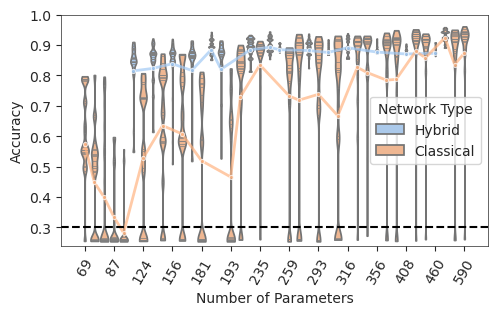

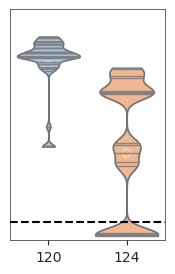

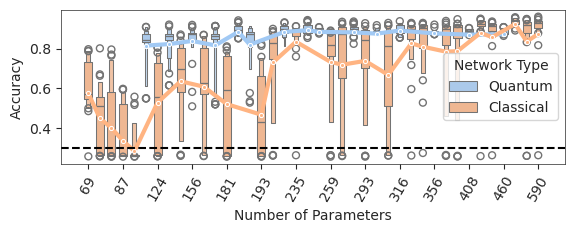

In [205]:
n = 3
fig1 = plt.figure(figsize=(5.5,3))
ax1 = sns.violinplot(df_k8_stat, x='Num Params', y='Acc', hue='Network Type', 
               hue_order=['Quantum', 'Classical'], width=0.8, bw_method=0.1, inner='stick', split=False, cut=0, 
               density_norm='count', inner_kws={'color': 'grey', 'alpha':0.8})

df_k8_m = copy.deepcopy(df_k8_mean)
df_k8_m.replace({'cutoff': {'classical': -1}}, inplace=True)
df_k8_m['cutoff'] = df_k8_m['cutoff'].apply(pd.to_numeric)
df_k8_m.drop(columns=['raw_data'], inplace=True)
columns = list(df_k8_m.columns)
columns.remove('cutoff')
df_k8_m = df_k8_m.groupby(['num_params', 'network_type']).mean()
df_k8_m.reset_index(inplace=True)
df_k8_m = df_k8_m.sort_values('num_params')
for t,l in zip(ax1.legend_.texts, ['Hybrid', 'Classical']):
    t.set_text(l) 
#plt.plot(df_k8_m[df_k8_m['network_type']=='classical']['acc'], '--', color='k', alpha=0.8)
sns.lineplot(df_k8_m, x=df_k8_m.index, y='acc', 
             #style='network_type', 
             hue='network_type',
             linewidth=2,
             marker='.',
             hue_order=['quantum', 'classical'],
             style_order=['quantum', 'classical'], 
             alpha=0.7,
             legend=None)
plt.axhline(y=0.3, color='k', linestyle='--')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Number of Parameters')
plt.ylim(0.24, 1.0)

[l.set_visible(False) for (i,l) in enumerate(ax1.xaxis.get_major_ticks()) if i % n != 0]
plt.xticks(rotation=60)
plt.savefig('kerr_encoding_violinplot.svg')
plt.show()


cl_nparams = 124
q_nparams = 120

fig= plt.figure(figsize=(2,3))
ax1 = sns.violinplot(df_k8_stat[(df_k8_stat['Num Params'] == q_nparams) | (df_k8_stat['Num Params']== cl_nparams)], x='Num Params', y='Acc', hue='Network Type', legend=None, 
               hue_order=['Quantum', 'Classical'], width=0.8, bw_method=0.1, inner='stick', split=False, cut=0, 
               density_norm='count', inner_kws={'lw': 1, 'color': 'grey', 'alpha':0.9}, native_scale=True)
sns.scatterplot(df_k8_m[(df_k8_m['num_params'] == q_nparams) | (df_k8_m['num_params']== cl_nparams)], x='num_params', y='acc', hue='network_type', legend=None,
                hue_order=['quantum', 'classical'], alpha=0.9)

plt.ylim(0.24,1.0)

plt.yticks([])
plt.xticks([q_nparams,cl_nparams],[q_nparams,cl_nparams])
plt.xlabel('')
plt.ylabel('')
plt.axhline(y=0.3, color='k', linestyle='--')
plt.savefig('kerr_encoding_violinplot_q_nparams_cl_nparams.svg')
plt.show()

fig1 = plt.figure(figsize=(6.5, 2))
ax1 = sns.boxenplot(df_k8_stat, x='Num Params', y='Acc', 
                    hue='Network Type', width_method='exponential', k_depth='trustworthy', 
                    width=0.7, hue_order=['Quantum', 'Classical'])
df_k8_m = copy.deepcopy(df_k8_mean)
df_k8_m.replace({'cutoff': {'classical': -1}}, inplace=True)
df_k8_m['cutoff'] = df_k8_m['cutoff'].apply(pd.to_numeric)
df_k8_m.drop(columns=['raw_data'], inplace=True)
columns = list(df_k8_m.columns)
columns.remove('cutoff')
df_k8_m = df_k8_m.groupby(['num_params', 'network_type']).mean()
df_k8_m.reset_index(inplace=True)
df_k8_m = df_k8_m.sort_values('num_params')
 
#plt.plot(df_k8_m[df_k8_m['network_type']=='classical']['acc'], '--', color='k', alpha=0.8)
sns.lineplot(df_k8_m, x=df_k8_m.index, y='acc', 
             #style='network_type', 
             hue='network_type',
             linewidth=3,
             marker='.',
             hue_order=['quantum', 'classical'],
             style_order=['quantum', 'classical'], legend=None)
plt.axhline(y=0.3, color='k', linestyle='--')
ax1.set_ylabel('Accuracy')
ax1.set_xlabel('Number of Parameters')

[l.set_visible(False) for (i,l) in enumerate(ax1.xaxis.get_major_ticks()) if i % n != 0]

plt.xticks(rotation=60)
plt.savefig('kerr_encoding_boxenplot.svg')
plt.show()

In [98]:
# def plot_param_sweep(df, param='cutoff', fname='cutoff_sweep'):    
#     df_cutoff = df[df['network_type']=='quantum'].groupby([param, 'num_qumodes']).apply(np.mean)
#     df_cutoff[param] = df_cutoff[param].apply(int)
#     df_classical = df[df['network_type']=='classical'].groupby([param, 'num_qumodes']).apply(np.mean)

#     color_dict = dict(zip(df['num_qumodes'].unique(), colors))
#     fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(6,6), sharex=True)
#     axs[0,0].set_ylabel('Accuracy')
#     axs[1,0].set_ylabel('Accuracy')
#     axs[0,1].set_ylabel('Loss')
#     axs[1,1].set_ylabel('Loss')

#     axs[1,0].set_xlabel(param.capitalize())
#     axs[1,1].set_xlabel(param.capitalize())

#     axs[0,0].set_xticks(df_cutoff[param].unique(), df_cutoff[param].unique())
#     axs_dict = dict(zip(['acc', 'loss', 'val_acc', 'val_loss'], axs.flatten()))
#     for i, row in df_cutoff.iterrows():
#         for metric in ['acc', 'loss', 'val_acc', 'val_loss']:
#             axs_dict[metric].errorbar(row[param], row[metric], yerr=row[f'{metric}_std'], fmt='o', color=color_dict[row['num_qumodes']], alpha=0.8)

#     if param == 'n_layers':
#         alpha = lambda x: 0.8*(x/df_classical[param].unique()[-1])
#         for i, row in df_classical.iterrows():
#             for metric in ['acc', 'loss', 'val_acc', 'val_loss']:
#                 axs_dict[metric].hlines([row[metric], row[metric]], df_cutoff[param].unique()[0], df_cutoff[param].unique()[-1], ls='--', color=color_dict[row['num_qumodes']], alpha=alpha(row[param]))
#     else:
#          for i, row in df_classical.iterrows():
#             for metric in ['acc', 'loss', 'val_acc', 'val_loss']:
#                 axs_dict[metric].hlines([row[metric], row[metric]], df_cutoff[param].unique()[0], df_cutoff[param].unique()[-1], ls='--', color=color_dict[row['num_qumodes']], alpha=0.8)


#     for key,val in color_dict.items():
#         plt.plot([], [], marker='o', lw=0 , color=val, label=f'{key} Qumodes')

#     ax2  = axs[0,1].twinx()
#     ax2.set_yticks([])
#     ax2.set_yticklabels([])
#     ax2.set_ylabel(f'Training') 

#     ax2  = axs[1,1].twinx()
#     ax2.set_yticks([])
#     ax2.set_yticklabels([])
#     ax2.set_ylabel(f'Testing')   
#     fig.suptitle(f'Param Sweep: {param.capitalize()}')

#     fig.legend()
#     fig.tight_layout()

# plot_param_sweep(df_o_mean, param='cutoff', fname='cutoff_sweep')
# plot_param_sweep(df_k_mean, param='cutoff', fname='cutoff_sweep_kerr')
# plot_param_sweep(df_o_mean, param='n_layers', fname='n_layers_sweep')
# plot_param_sweep(df_k_mean, param='n_layers', fname='n_layers_sweep_kerr')
# plot_param_sweep(df_k8_mean, param='cutoff', fname='cutoff_sweep_kerr8')
# plot_param_sweep(df_k8_mean, param='n_layers', fname='n_layers_sweep_kerr8')

# Generate timing plots

In [100]:
# from common_packages.calc_time import calc_time, generate_time_database, calc_time_per_epoch, find_max_time
# import seaborn as sns
# def generate_time_df(ex_path):
#     time_data = generate_time_database(ex_path) 
#     df_time = pd.DataFrame(columns=time_data[1]['config'].keys())
#     df_time['time'] = np.nan
#     df_time.pop('__doc__')
#     for exp, val in time_data.items():
#         config = val['config']
#         config.pop('__doc__', None)
#         if config['iteration'] != -1:
#             time = val['time']
#             df_time.loc[exp] = [*config.values(), time] 
#     df_time.pop('iteration')
#     df_time.loc[df_time['network_type']=='classical', 'cutoff'] = 0
#     df_time['time'] = df_time['time'] / np.timedelta64(1,'h')
#     df_time_mean = df_time.groupby(['network_type', 'n_layers', 'num_qumodes', 'cutoff']).mean()
#     df_time_mean.reset_index(inplace=True)
#     display(df_time.head())
#     # display(df_time_mean.head())
#     display(df_time.describe())
#     display(df_time_mean.describe())
#     return df_time, df_time_mean

# df_time_orig, df_time_mean_orig = generate_time_df('/home/st4eve/Mounts/graham/synthetic_data/Synthetic_Quantum_Base_Experiment_cutoff_sweep')
# df_time_kerr, df_time_mean_kerr = generate_time_df('/home/st4eve/Mounts/graham/synthetic_data/Synthetic_Quantum_Base_Kerr')

# def plot_time_violin(df, fname='time_violin'):
#     sns.violinplot(df[df['network_type']=='quantum'], x='n_layers', hue='num_qumodes', y='time', bw=0.4, cut=True)
#     plt.show()
#     sns.violinplot(df[df['network_type']=='quantum'], hue='num_qumodes', x='cutoff', y='time', bw=0.4, cut=True)
#     plt.show()
#     sns.scatterplot(df[df['network_type']=='classical'], hue='num_qumodes', x='n_layers', y='time')
#     plt.show()
#     print('Correlation Matrix')
#     display(df.corr())

# plot_time_violin(df_time_mean_orig, 'time_violin_orig')
# plot_time_violin(df_time_mean_kerr, 'time_violin_kerr')
# print(df_o['num_exps'].describe())
# sns.histplot(df_o, x='num_exps', hue='network_type')
# sns.displot(df_time_mean_orig[df_time_mean_orig['network_type']=='quantum'], x='time', hue='num_qumodes', kind='kde', cut=0, fill=True)
# sns.displot(df_time_mean_kerr[df_time_mean_kerr['network_type']=='quantum'], x='time', hue='num_qumodes', kind='kde', cut=0, fill=True)

In [102]:
import numpy as np
from quantum_base import Net as Net_orig
from quantum_base import OPTIMIZER, LOSS_FUNCTION
from quantum_base_kerr import Net as Net_kerr
from data import generate_synthetic_dataset_easy
import seaborn as sns
from itertools import product
test_data, validate_data = generate_synthetic_dataset_easy(num_datapoints=1000, n_features=8, n_classes=4)


df_orig['model'] = Net_orig
df_orig['exp_folder'] = '/home/st4eve/Mounts/graham/synthetic_data/Synthetic_Quantum_Base_Experiment_cutoff_sweep/'
df_kerr8['model'] = Net_kerr
df_kerr8['exp_folder'] = ex_path_kerr8 + '/'
def plot_network_certainty_dist(df, metric='acc', fname='network_certainty_dist', validate_data=validate_data):  
    df_final = copy.deepcopy(df)
    df_final[metric] = df[metric].apply(lambda x: x[-1])
    df_quantum = df_final[df_final['network_type']=='quantum']
    df_quantum = df_quantum[df_quantum['num_qumodes']==2]
    df_classical = df_final[df_final['network_type']=='classical']

    exp_folder = df_quantum['exp_folder'].unique()[0]
 
    for n in df_quantum['num_qumodes'].unique():
        for c in df_quantum[df_quantum['num_qumodes']==n]['cutoff'].unique():
            for nl in df_quantum.loc[(df_quantum['num_qumodes']==n) & (df_quantum['cutoff']==c)]['n_layers'].unique():
                exp_quantum = df_quantum.loc[(df_quantum['num_qumodes']==n) & (df_quantum['cutoff']==c) & (df_quantum['n_layers']==nl)][metric]
                exp_classical = df_classical.loc[(df_classical['num_qumodes']==n) & (df_classical['n_layers']==nl)][metric]
                if len(exp_quantum) == 0 or len(exp_classical) == 0:
                    continue
                else:
                    exp_quantum = exp_quantum.idxmax()
                    exp_classical = exp_classical.idxmax()
                    print('For Number of Qumodes: ', n, ' Cutoff: ', c, ' Layers: ', nl)
                    print(f'Highest Accuracy Experiments\nQuantum: {exp_quantum} \nClassical: {exp_classical}')
                    print(f'Val Acc Quantum: {df_quantum.loc[exp_quantum, "val_acc"][-1]}')
                    model = df_final['model'][exp_quantum](
                        network_type='quantum',
                        num_qumodes=n,
                        n_layers=nl,
                        cutoff=c,
                        max_initial_weight=0.15
                    )
                    model.compile(optimizer=OPTIMIZER, loss=LOSS_FUNCTION, metrics=["accuracy"])
                    output_quantum = model(validate_data[0][0:1])
                    try:
                        model.load_weights(f'{exp_folder}{exp_quantum}/weights/weight99.ckpt', by_name=False).expect_partial()
                    except:
                        model.load_weights(f'{exp_folder}{exp_quantum}/weights/weight.99.ckpt', by_name=False).expect_partial()
                    output_quantum = model(validate_data[0])

                    #loss_quantum, acc_quantum = model.evaluate(validate_data[0], validate_data[1])

                    model_classical = df_final['model'][exp_classical](
                        network_type='classical',
                        num_qumodes=n,
                        n_layers=nl,
                        cutoff=1,
                        max_initial_weight=0.15
                    )

                    model_classical.load_weights(f'{exp_folder}{exp_classical}/weights/weight99.ckpt', by_name=False).expect_partial()
                    model_classical.compile(optimizer=OPTIMIZER, loss=LOSS_FUNCTION, metrics=["accuracy"])
                    output_classical = model_classical(validate_data[0])

                    loss_classical, acc_classical = model_classical.evaluate(validate_data[0], validate_data[1])
                    
                    plot_df = pd.DataFrame(columns=['Quantum', 'Classical'])
                    plot_df['Quantum']=np.max(output_quantum, axis=1)
                    plot_df['Classical']=np.max(output_classical, axis=1)

                    print(f'Average Maximum Output Probability\nQuantum: {np.mean(np.max(output_quantum, axis=1))}\nClassical: {np.mean(np.max(output_classical, axis=1))}')
                    sns.displot(plot_df)
                    plt.xlabel(f'Maximum Output Probability')
                    plt.title(f'Certainty Distribution\n{metric.capitalize()} {n} Qumodes {c} Cutoff {nl} Layers')
                    plt.show()


plot_network_certainty_dist(df_kerr8[(df_kerr8['num_qumodes']==2) & (df_kerr8['n_layers']==1) & ( (df_kerr8['cutoff']==5) | (df_kerr8['cutoff']=='classical') )], validate_data=validate_data)

For Number of Qumodes:  2  Cutoff:  5  Layers:  1
Highest Accuracy Experiments
Quantum: 269 
Classical: 43377
Val Acc Quantum: 0.846666693687439
Before [[ 0.3633346   0.15376651  0.46324062 -0.24814847 -0.52594584  0.46965694
   0.16694838  0.15604448 -0.13706174  0.34843218]
 [ 0.46821404  0.14071333  0.32675755  0.17151982 -0.2027703   0.3599292
   0.36929584 -0.5541675  -0.4367655   0.20950514]
 [ 0.08882499 -0.02612203 -0.524367    0.43351912  0.33682257  0.14758736
   0.2499842   0.12058079  0.5296912   0.18868268]
 [-0.35663646 -0.47605425 -0.4156088   0.46757925  0.43436193 -0.17330828
  -0.39464784 -0.41485226  0.31534928 -0.44863844]
 [ 0.530175    0.22556847 -0.30522862  0.12430066  0.01326913  0.15231997
   0.56007135  0.20371002 -0.426202   -0.14590788]
 [ 0.43052864  0.5056349   0.2279566  -0.16425416 -0.21751699  0.4878806
   0.04279321 -0.02299279 -0.54541385  0.29012322]
 [-0.04588968 -0.12525392 -0.05813003  0.07022119 -0.08871624  0.03780293
   0.26033294  0.4801371  

NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for /home/st4eve/Mounts/graham/synthetic_data/Classical_Small_kerr/43377/weights/weight99.ckpt

In [ ]:
plot_network_certainty_dist(df_orig, validate_data=validate_data, metric='acc')

,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,class
0,-2.076939,-2.751940,3.052263,1.608070,-1.556616,0.501773,4.012500,2.401384,0
1,-2.796866,2.307075,1.017351,3.577217,-2.744742,-3.296011,-2.037360,3.291815,2
2,-1.452832,-4.345707,1.570871,2.202071,-3.618776,-2.669265,4.726448,2.461469,0
3,1.978186,3.014524,-2.902569,2.211873,6.319457,3.530111,3.955829,-2.123560,2
4,-3.308904,4.895081,2.596946,6.403708,-2.154314,-2.910124,-2.408569,2.809969,2


,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,class
feature 1,1.000000,0.235624,-0.466209,-0.244353,-0.014540,0.336312,0.433449,-0.489186,-0.236438
feature 2,0.235624,1.000000,0.209868,0.260129,0.195203,0.151446,0.094239,-0.330854,-0.141278
feature 3,-0.466209,0.209868,1.000000,0.251172,0.025905,-0.237648,-0.305174,0.263300,0.003319
feature 4,-0.244353,0.260129,0.251172,1.000000,0.204732,0.187861,0.090667,0.244911,-0.143247
feature 5,-0.014540,0.195203,0.025905,0.204732,1.000000,0.296911,-0.100851,-0.210543,0.088512
feature 6,0.336312,0.151446,-0.237648,0.187861,0.296911,1.000000,-0.060470,0.029651,0.128460
feature 7,0.433449,0.094239,-0.305174,0.090667,-0.100851,-0.060470,1.000000,-0.362464,-0.420957
feature 8,-0.489186,-0.330854,0.263300,0.244911,-0.210543,0.029651,-0.362464,1.000000,0.134218
class,-0.236438,-0.141278,0.003319,-0.143247,0.088512,0.128460,-0.420957,0.134218,1.000000


/tmp/ipykernel_2621/1307659282.py:39: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.


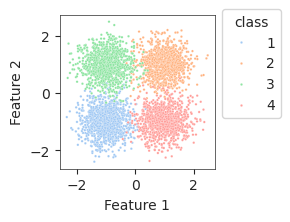

In [184]:
import numpy as np
from quantum_base import Net as Net_orig
from quantum_base import OPTIMIZER, LOSS_FUNCTION
from quantum_base_kerr import Net as Net_kerr
from data import generate_synthetic_dataset_easy_raw, generate_synthetic_dataset_easy
import seaborn as sns
import tensorflow as tf
from tensorflow.python.tools.inspect_checkpoint import print_tensors_in_checkpoint_file
from itertools import product
import fnmatch
import os
train_data, validate_data = generate_synthetic_dataset_easy_raw(num_datapoints=1000, n_features=8, n_classes=4)
x_train, y_train = train_data
x_val, y_val = validate_data

columns = [f'feature {i+1}' for i in range(8)] + ['class']
df_data = pd.DataFrame(columns=columns)
df_data['class'] = y_val
df_data[columns[:-1]] = x_val

display(df_data.head())
display(df_data.corr())

palette_temp = palette[0:4]

# sns.pairplot(df_data, hue='class', palette=palette_temp, kind='scatter')
# plt.show()
df_data_fake = pd.DataFrame(columns=['feature 1', 'feature 2', 'class'])
cluster1 = np.random.multivariate_normal([-1,-1], [[0.2,0],[0,0.2]], 1000)
cluster2 = np.random.multivariate_normal([1,1], [[0.2,0],[0,0.2]], 1000)
cluster3 = np.random.multivariate_normal([-1,1], [[0.2,0],[0,0.2]], 1000)
cluster4 = np.random.multivariate_normal([1,-1], [[0.2,0],[0,0.2]], 1000)

df_data_fake['feature 1'] = np.concatenate([cluster1[:,0], cluster2[:,0], cluster3[:,0], cluster4[:,0]])
df_data_fake['feature 2'] = np.concatenate([cluster1[:,1], cluster2[:,1], cluster3[:,1], cluster4[:,1]])
df_data_fake['class'] = np.concatenate([np.ones(1000), np.ones(1000)*2, np.ones(1000)*3, np.ones(1000)*4])
df_data_fake['class'] = df_data_fake['class'].apply(int)
fig = plt.figure(figsize=(2,2))
ax1 = sns.scatterplot(df_data_fake, x='feature 1', y='feature 2', hue='class', palette=palette, s=3.0)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
sns.move_legend(ax1, "upper left", bbox_to_anchor=(1, 1.08))
plt.savefig('sample_data.svg', dpi=300, bbox_inches='tight')
plt.show()

In [208]:
df_orig['model'] = Net_orig
df_orig['exp_folder'] = ex_path + '/' 
df_kerr8['model'] = Net_kerr
df_kerr8['exp_folder'] = ex_path_kerr8 + '/' 


train_data, validate_data = generate_synthetic_dataset_easy(num_datapoints=1000, n_features=8, n_classes=4)
def plot_network_output_dist(df, metric='acc', fname='network_certainty_dist', validate_data=validate_data):  
    df_final = copy.deepcopy(df)
    df_final[metric] = df[metric].apply(lambda x: x[-1])
    df_quantum = df_final[df_final['network_type']=='quantum']
    df_quantum = df_quantum[df_quantum['num_qumodes']==2]
    df_classical = df_final[df_final['network_type']=='classical']

    plot_df = pd.DataFrame(columns=df_final.columns)
    plot_df.drop(columns=['acc', 'val_acc', 'loss', 'val_loss'], inplace=True)
    plot_df['1'] = np.nan
    plot_df['2'] = np.nan
    plot_df['3'] = np.nan
    plot_df['4'] = np.nan
    plot_df['pred_class'] = np.nan 
    plot_df['pred_value'] = np.nan
    plot_df['true_class'] = np.nan
    plot_df['exp_num'] = np.nan 
    plot_df['sample_num'] = np.nan

    exp_folder = df_quantum['exp_folder'].unique()[0]
    for n in df_quantum['num_qumodes'].unique():
        for c in df_quantum[df_quantum['num_qumodes']==n]['cutoff'].unique():
            for nl in df_quantum.loc[(df_quantum['num_qumodes']==n) & (df_quantum['cutoff']==c)]['n_layers'].unique():
                exp_quantum = df_quantum.loc[(df_quantum['num_qumodes']==n) & (df_quantum['cutoff']==c) & (df_quantum['n_layers']==nl)][metric]
                exp_classical = df_classical.loc[(df_classical['num_qumodes']==n) & (df_classical['n_layers']==nl)][metric]
                if (len(exp_quantum) == 0) or (len(exp_classical) == 0):
                    continue
                else:
                    exp_quantum = exp_quantum.idxmax()
                    exp_classical = exp_classical.idxmax()
                    print('For Number of Qumodes: ', n, ' Cutoff: ', c, ' Layers: ', nl)
                    print(f'Highest Accuracy Experiments\nQuantum: {exp_quantum}')
                    print(f'Quantum Val Acc, loss: {df_quantum.loc[exp_quantum, "val_acc"][-1]}, {df_quantum.loc[exp_quantum, "val_loss"][-1]}')
                    print(f'Classical Val Acc, loss: {df_classical.loc[exp_classical, "val_acc"][-1]}, {df_classical.loc[exp_classical, "val_loss"][-1]}')
                    model = df_final['model'][exp_quantum](
                        network_type='quantum',
                        num_qumodes=n,
                        n_layers=nl,
                        cutoff=c,
                        max_initial_weight=0.15
                    )

                    model.compile(optimizer=OPTIMIZER, loss=LOSS_FUNCTION, metrics=["accuracy"])
                    output_quantum = model(validate_data[0][0:1])
                    try:
                        model.load_weights(f'{exp_folder}{exp_quantum}/weights/weight.99.ckpt', by_name=False)
                    except:
                        model.load_weights(f'{exp_folder}{exp_quantum}/weights/weight99.ckpt', by_name=False)
                    output_quantum = np.array(model(validate_data[0]))
                    
                    plot_dict = copy.deepcopy(df_quantum.loc[exp_quantum])
                    plot_dict.drop(['acc', 'val_acc', 'loss', 'val_loss'], inplace=True)
                    for i, (val, true_class) in enumerate(zip(output_quantum, np.argmax(validate_data[1], axis=1))):
                        plot_dict['1'] = val[0]
                        plot_dict['2'] = val[1]
                        plot_dict['3'] = val[2]
                        plot_dict['4'] = val[3]
                        plot_dict['true_class'] = true_class + 1
                        plot_dict['pred_class'] = np.argmax(val) + 1
                        plot_dict['pred_value'] = np.max(val)
                        plot_dict['exp_num'] = exp_quantum
                        plot_dict['sample_num'] = i
                        plot_df.loc[i] = plot_dict
                     
            
                    model_classical = df_final['model'][exp_classical](
                        network_type='classical',
                        num_qumodes=n,
                        n_layers=nl,
                        cutoff=-1,
                        max_initial_weight=0.15
                    )
                    try:
                        model_classical.load_weights(f'{exp_folder}{exp_classical}/weights/weight.99.ckpt', by_name=False).expect_partial()
                    except:
                        model_classical.load_weights(f'{exp_folder}{exp_classical}/weights/weight99.ckpt', by_name=False).expect_partial()
                    model_classical.compile(optimizer=OPTIMIZER, loss=LOSS_FUNCTION, metrics=["accuracy"])
                    output_classical = np.array(model_classical(validate_data[0]))
                    plot_dict = copy.deepcopy(df_classical.loc[exp_classical])
                    plot_dict.drop(['acc', 'val_acc', 'loss', 'val_loss'], inplace=True)
                    shift = plot_df['sample_num'].max() + 1
                    for i, (val, true_class) in enumerate(zip(output_classical, np.argmax(validate_data[1], axis=1))):
                        plot_dict['o1'] = val[0]
                        plot_dict['o2'] = val[1]
                        plot_dict['o3'] = val[2]
                        plot_dict['o4'] = val[3]
                        plot_dict['pred_class'] = np.argmax(val) + 1
                        plot_dict['pred_value'] = np.max(val)
                        plot_dict['true_class'] = true_class + 1
                        plot_dict['exp_num'] = exp_classical
                        plot_dict['sample_num'] = i
                        plot_df.loc[i+shift] = plot_dict

    return plot_df        

plot_df_kerr = plot_network_output_dist(df_kerr8[(df_kerr8['n_layers']==1) & ( (df_kerr8['cutoff']==9) | (df_kerr8['cutoff']=='classical'))], validate_data=validate_data)
#plot_df_kerr_train = plot_network_output_dist(df_kerr8[(df_kerr8['n_layers']==1) & ( (df_kerr8['cutoff']==9) | (df_kerr8['cutoff']=='classical'))], metric='loss', validate_data=train_data)
#plot_df_orig = plot_network_output_dist(df_orig, validate_data=validate_data)

display(plot_df_kerr.head()) 

For Number of Qumodes:  2  Cutoff:  9  Layers:  1
Highest Accuracy Experiments
Quantum: 49
Quantum Val Acc, loss: 0.8833333253860474, 0.5302165746688843
Classical Val Acc, loss: 0.7900000214576721, 0.6022496223449707


In [199]:
plot_df_melted = plot_df_kerr.melt(id_vars=['network_type', 'cutoff', 'num_params', 'num_qumodes', 'n_layers', 'true_class', 'sample_num'], value_vars=['o1', 'o2', 'o3', 'o4'])
plot_df_melted['variable'] = plot_df_melted['variable'].apply(lambda x: int(x[1:]))

plot_df_melted_train = plot_df_kerr_train.melt(id_vars=['network_type', 'cutoff', 'num_params', 'num_qumodes', 'n_layers', 'true_class', 'sample_num'], value_vars=['o1', 'o2', 'o3', 'o4'])
plot_df_melted_train['variable'] = plot_df_melted_train['variable'].apply(lambda x: int(x[1:]))


/tmp/ipykernel_2621/975657941.py:3: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
/home/st4eve/miniconda3/envs/CVTrain/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 20.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
/home/st4eve/miniconda3/envs/CVTrain/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
/home/st4eve/miniconda3/envs/CVTrain/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 12.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
/home/st4eve/miniconda3/envs/CVTrain/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 16.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
/home/st4eve/mini

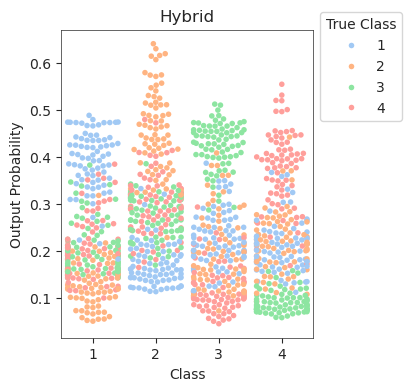

/tmp/ipykernel_2621/975657941.py:20: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
/home/st4eve/miniconda3/envs/CVTrain/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 54.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
/home/st4eve/miniconda3/envs/CVTrain/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 32.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
/home/st4eve/miniconda3/envs/CVTrain/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 39.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
/home/st4eve/miniconda3/envs/CVTrain/lib/python3.10/site-packages/seaborn/categorical.py:3370: UserWarning: 38.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
/home/st4eve/min

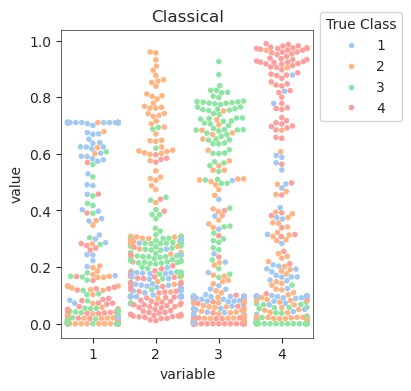

In [202]:
fig, ax = plt.subplots(1,1,figsize=(3.25, 4))

ax1 = sns.swarmplot(plot_df_melted[plot_df_melted['network_type']=='quantum'],
               x='variable', 
               y='value', 
               hue='true_class',
               palette=palette,
               s=4.0,
               ax=ax)

sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.08))
plt.xlabel('Class')
plt.ylabel('Output Probability')
plt.title('Hybrid')
ax1.legend_.set_title('True Class')
plt.savefig('val_data_raw_output_quantum.svg', dpi=300, bbox_inches='tight')
plt.show()

fig, ax = plt.subplots(1,1,figsize=(3.25, 4))
ax1 = sns.swarmplot(plot_df_melted[plot_df_melted['network_type']=='classical'],
               x='variable', 
               y='value', 
               hue='true_class',
               palette=palette,
               s=4.0,
               ax=ax)

ax1.legend_.set_title('True Class')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1.08))
plt.title('Classical')
plt.savefig('val_data_raw_output_classical.svg', dpi=300, bbox_inches='tight')
plt.show()


fig, ax = plt.subplots(1,1,figsize=(3.25, 4))
ax1 = sns.swarmplot()